In [1]:
import pandas as pd 
FILE_PATH = "C:\\Documents\\MLDP_PROJECT\\adult.csv"
df = pd.read_csv(FILE_PATH)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [2]:
# Check for missing values and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


<Axes: xlabel='income', ylabel='count'>

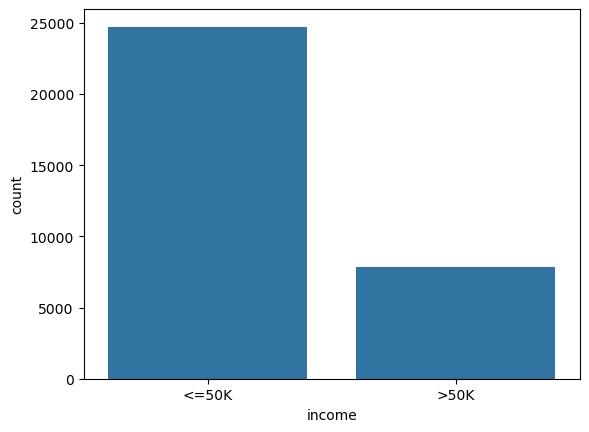

In [3]:
import seaborn as sns
sns.countplot(x='income', data=df)

In [4]:
# Check for exact duplicates (Real data has some, but synthetic data often has more or none)
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 24


In [5]:
# Check the "long tail" of native countries
print(df['native.country'].value_counts())

native.country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

In [6]:
import numpy as np

# Replace '?' with NaN so pandas recognizes them as missing
df.replace('?', np.nan, inplace=True)

# Check which columns have missing values
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


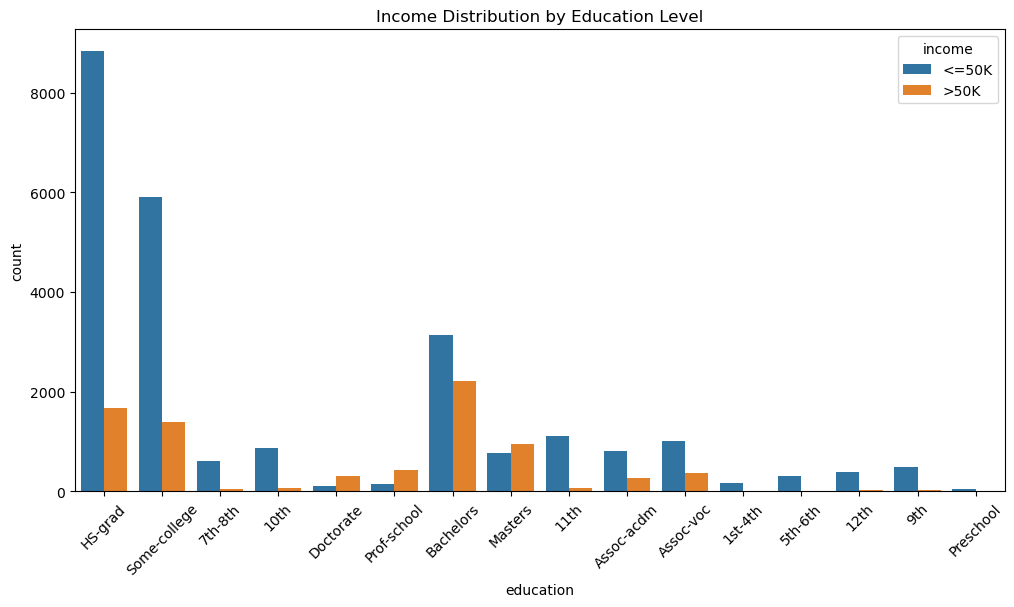

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# See how Education affects Income
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='education', hue='income')
plt.xticks(rotation=45)
plt.title("Income Distribution by Education Level")
plt.show()

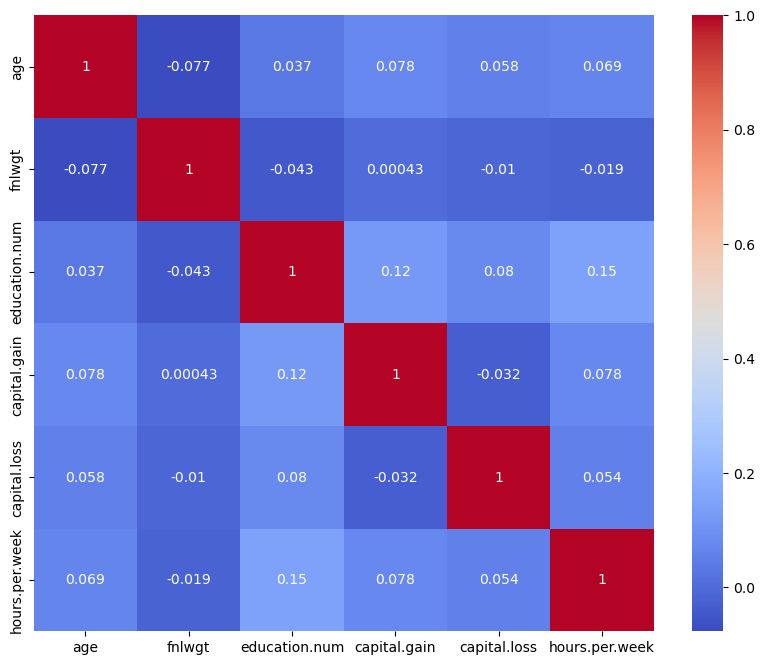

In [8]:
# Simplify native country as a first step
df['native.country'] = df['native.country'].apply(lambda x: 'United-States' if x == 'United-States' else 'Other')

# Drop redundancy: education and education.num represent the same thing
df.drop('education', axis=1, inplace=True)

# Visualize correlations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

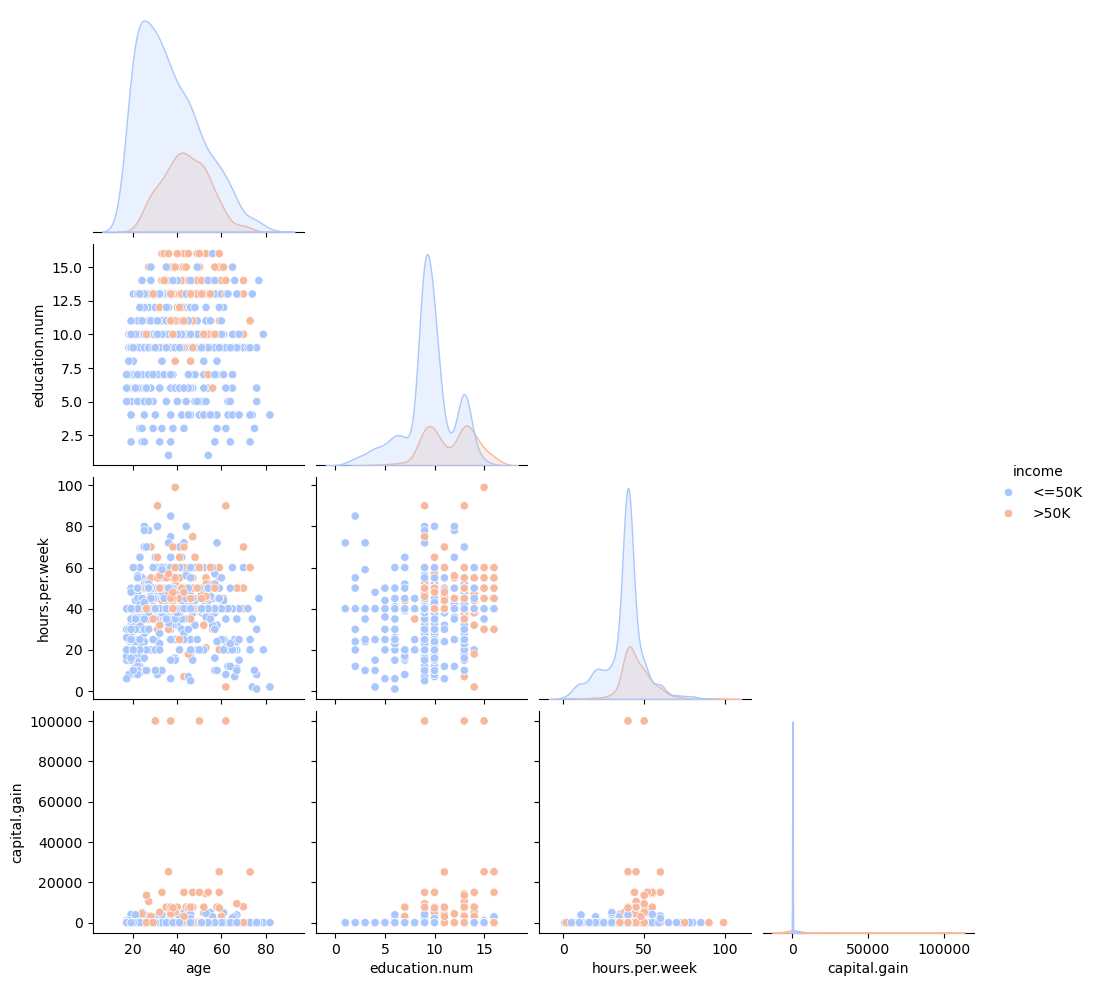

In [9]:
# Select key numerical columns and sample 1000 rows for speed/clarity
cols_to_plot = ['age', 'education.num', 'hours.per.week', 'capital.gain', 'income']
sns.pairplot(df[cols_to_plot].sample(1000), hue='income', palette='coolwarm', corner=True)
plt.show()

In [10]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [11]:
df_final = pd.get_dummies(df, drop_first=True)

In [12]:
from sklearn.model_selection import train_test_split

X = df_final.drop('income', axis=1)
y = df_final['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
# n_estimators=100 means we are using 100 decision trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
predictions = rfc.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("\nClassification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[4635  341]
 [ 615  922]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4976
           1       0.73      0.60      0.66      1537

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513



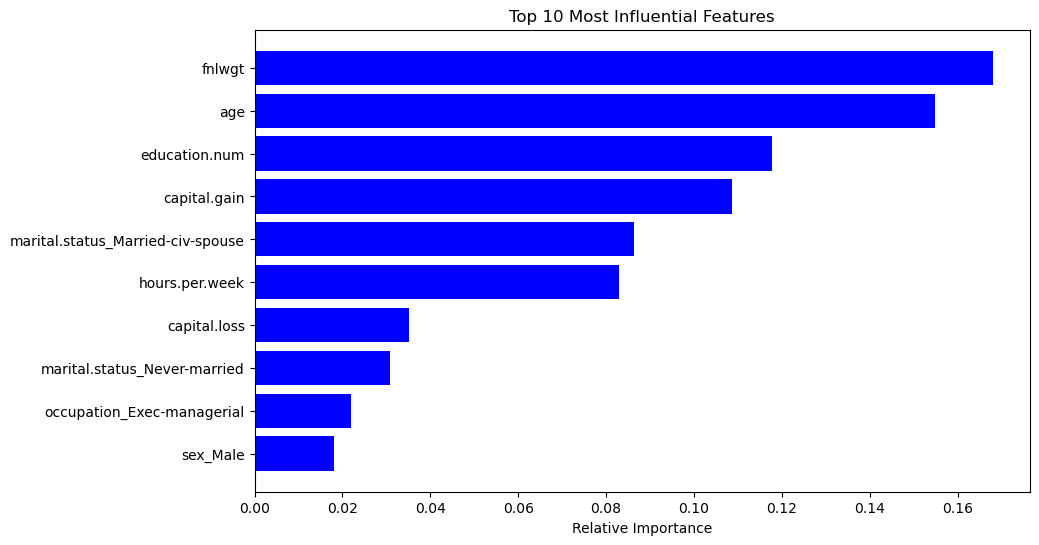

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Extract importance scores
importances = rfc.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.title('Top 10 Most Influential Features')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report
# Define the grid with EXACTLY 3 values per parameter as specified
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the search
# n_iter=10 randomly samples 10 combinations
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10, 
    cv=3, 
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# Fit the search
random_search.fit(X_train, y_train)

# Output results
print(f"Best Parameters: {random_search.best_params_}")

# Evaluate the new best model
best_rf = random_search.best_estimator_
final_preds = best_rf.predict(X_test)

# Explicitly calculate the F1-score for the final tuned model
final_f1 = f1_score(y_test, final_preds)

from sklearn.metrics import classification_report
print(f"\nFinal Tuned Model F1-Score: {final_f1:.4f}")
print("\n--- Final Tuned Model Report ---")
print(classification_report(y_test, final_preds))

Best Parameters: {'n_estimators': 100, 'min_samples_leaf': 2, 'max_depth': 30}

Final Tuned Model F1-Score: 0.6774

--- Final Tuned Model Report ---
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4976
           1       0.77      0.60      0.68      1537

    accuracy                           0.86      6513
   macro avg       0.83      0.77      0.80      6513
weighted avg       0.86      0.86      0.86      6513



In [19]:
import joblib

# 1. Save the best model found by your search
joblib.dump(best_rf, 'income_prediction_model.pkl')

# 2. IMPORTANT: Save the exact column order from X_train
# New data MUST have columns in this exact order to work
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')

print("Model saved and ready for deployment!")

Model saved and ready for deployment!


In [ ]:
df_dt_feat_impt = pd.DataFrame ({"Feature": dt.feature_names_in_, "Importance": dt.feature_importances_})

df_dt_feat_impt['Feature'] = df_dt_feat_impt["Feature"].str.rsplit("_", n=1).str[0]
df_dt_feat_impt = df_dt_feat_impt.groupby("Feature")["Importance"].sum().sort_values(ascending=False)

df_dt_feat_impt["Cumulative Importance"] = df_dt_feat_impt["Importance"].cumsum()

df_dt_feat_impt

In [ ]:
## Plot feature importance and cumulative importance
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for feature importance
ax1.bar(df_dt_feat_impt['Feature'], df_dt_feat_impt['Importance'], color='skyblue')
ax1.set_xlabel('Features', size=15)
ax1.set_ylabel('Feature Importance', color='blue', size=15)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=15)
ax1.set_xticklabels(df_dt_feat_impt['Feature'], rotation=45, ha='right', size=15)


# Line chart for cumulative importance
ax2 = ax1.twinx()
ax2.plot(df_dt_feat_impt['Feature'], df_dt_feat_impt['Cumulative importance'], color='red', 
         marker='o')
ax2.set_ylabel('Cumulative Importance', color='red', size=15)
ax2.tick_params(axis='y', labelcolor='red', labelsize=15)

plt.title('Feature Importance and Cumulative Importance', size=15)
plt.tight_layout()
plt.show()
 